In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('ecenter15.csv',index_col=0)

In [3]:
data.head()

,id,dt,event,se_category,se_action,se_property,se_value,page
0,1a6c6ac6ade4d5b4,2019-05-19 19:31:05,page_view,NaN,NaN,NaN,NaN,/cat-mba/online-classes/
1,aafb519f9d47c70a,2019-05-19 19:31:07,page_view,NaN,NaN,NaN,NaN,/cl-online/ProductDesc.jsp
2,1a6c6ac6ade4d5b4,2019-05-19 19:31:05,struct,Leadgen,index,Not Set,0.0,/cat-mba/online-classes/
3,769fd41a41942405,2019-05-19 19:31:06,struct,Head_Icons,Click,1,NaN,/
4,e62ca977fc993ddc,2019-05-19 19:31:09,page_view,NaN,NaN,NaN,NaN,/ca-cs/cs/cs-course.html


In [4]:
data.describe(include='O')

,id,dt,event,se_category,se_action,se_property,page
count,298633,298633,298633,179311,170257,130862,298633
unique,7007,183923,2,18,113,3084,2098
top,ffd8a99a043a8efd,2019-05-31 12:48:22,struct,Purchase,Init,MBA,/cl-online/ProductDesc.jsp
freq,3397,14,179311,65291,33508,22760,97616


In [5]:
data.event.unique()

array(['page_view', 'struct'], dtype=object)

In [6]:
data.se_category.unique()

array([nan, 'Leadgen', 'Head_Icons', 'Purchase', 'Form Submit',
       'Dimensions', 'TrackVisit', 'ajaxSignIn', 'Nudge', 'Banner',
       'Lead Submit', 'ajaxSignUp', 'All_Programs', 'Debug', 'Chatbot',
       'Connect', 'LeadHooks', 'Notifications', 'SISLogin'], dtype=object)

In [7]:
data.se_action.unique()

array([nan, 'index', 'Click', 'Product Detail', 'Signup', 'Category Page',
       'Signin', 'LST', 'Init', 'na', '1632', 'MBA', 'Add to Cart',
       'Show', 'Success', 'Purchase', '1626', '1628', 'FREE ZONE',
       'Type Page', 'CBSE', 'Submited', 'CAT Repeater', 'BANKING',
       '1632 - Disabled', 'Revised CAT-MBA explorer landing',
       'Civils test series', 'SSC', 'AFTER-12', 'GRE', 'localStorage',
       'RBI', 'PSU', 'Submitted', 'CIVIL_SERVICE', 'GMAT',
       'SSC TS homepage', 'BANKING TS', 'IPM Books & Material', 'MEDICAL',
       'IPM Online Coaching', 'ENGG', 'CLASS-10', 'ETEN IAS', 'FMAP',
       'OTHER', 'New Free User Registration', '1628 - Disabled',
       'DATA ANALYTICS', 'CS', 'GMAT_Webinar_20_May', 'IIM Profilizer',
       'FinSchool', 'SIGNUP', 'FORMS', 'CA CS - CA Foundation',
       'Medical Beginners Guide', 'CAT Citywise campaign', 'IPM',
       'DataSchool', 'Live-Classes-JEE-2021', 'SKILLS', 'CAT', 'COURSES',
       '1626 - Disabled', 'Olympiad-signup', 

In [8]:
data.se_property.unique()

array([nan, 'Not Set', '1', ..., 'sushmitadas827@gmail.com',
       'pradeepsomvanshi838@gmail.com', 'allurisuresh49@gmail.com'],
      dtype=object)

In [9]:
data[data['se_category']=='Purchase'].se_action.unique()

array(['Product Detail', 'Init', 'Add to Cart', 'Success'], dtype=object)

##### se_property -> remove values with @ in them(removing email ids) and fetch unique categories

In [10]:
prop = data['se_property'].copy()
prop.dropna(inplace=True)

category = []
for item in prop:
    if '@' not in item:
        category.append(item)

category = np.array(category)
category = np.unique(category)

In [11]:
unique_ids = data['id']
unique_ids = np.array(unique_ids)
unique_ids = np.unique(unique_ids)

In [12]:
unique_ids.shape

(7007,)

##### Counting the number of email ids registered per each unique id

In [13]:
emails_per_id = dict((k,set()) for k in unique_ids)
for index,row in data.iterrows():
    if '@' in str(row[5]):
        emails_per_id[row[0]].add(row[5])

In [14]:
new_dict = dict((k,int) for k in unique_ids)
for key,value in emails_per_id.items():
    if isinstance(value,set):
        new_dict[key] = len(value)

In [15]:
sorted(new_dict.items(), key=lambda x: x[1], reverse=True)

[('22198238dd63b042', 27),
 ('81b0aefa7fcd07c8', 16),
 ('d10d12eb74b2094a', 14),
 ('1ead11c9bed82400', 11),
 ('74997a7f5f22904b', 11),
 ('ffd8a99a043a8efd', 11),
 ('198ca6723b47e0d0', 9),
 ('2b6235d74de5d459', 7),
 ('7041c69a60a90f1a', 7),
 ('288470d05fc9d054', 6),
 ('3ca3fbbc111d93b1', 6),
 ('8778cde4d652d0ae', 6),
 ('9917beae4d154d31', 6),
 ('6c28af038b1dfe3d', 5),
 ('73b2d2621f835003', 5),
 ('9a0c3dbf9b0d2c7c', 5),
 ('9d43a6833344e065', 5),
 ('a9fd043388635ee3', 5),
 ('cce22fff0e20a29f', 5),
 ('e65149377d29c99d', 5),
 ('054f82f45f71ae5a', 4),
 ('157e4b929754d6b0', 4),
 ('27ded6290ad61a3b', 4),
 ('542106153c80d718', 4),
 ('5efdaed335fe153a', 4),
 ('6150640c4dfe01a1', 4),
 ('6a911e74e31cafaa', 4),
 ('988da554d31136e4', 4),
 ('ad88ec22f7f5fc2f', 4),
 ('ca83eaee3673c38d', 4),
 ('dcdc567f1b9f8d56', 4),
 ('fd4156c70dd0dc08', 4),
 ('05b295c02fbe80cb', 3),
 ('076eefe6835a01bc', 3),
 ('0a27581c7e9f223a', 3),
 ('0ee242cb4b6b791f', 3),
 ('105891886b450f66', 3),
 ('15cd71b172f825e9', 3),
 ('189

In [16]:
new_list = []
for key,value in new_dict.items():
    if value<4:
        new_list.append(key)

new_data = data[data['id'].isin(new_list)]

success_data = new_data[(data['se_category']=='Purchase')&(data['se_action']=='Success')]
success_ids = success_data['id'].unique()
success_ids = success_ids.tolist()
success_data.shape

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(785, 8)

## Selecting the max number of email ids permissible per user id

For number of distinct email ids n, we have
- 800 Purchase Successes in total
- 790 Purchase Successes for n<10
- 790 Purchase Successes for n<8
- 789 Purchase Successes for n<5
- 785 Purchase Successes for n<4
- 765 Purchase Successes for n<3
- 674 Purchase Successes for n<2

So we settle for n<4, without losing any generality

#### Now, we need to reduce the noise in data by removing ids with few instances

In [17]:
min_ids =  dict(data['id'].value_counts())

min_list = []
for key,value in min_ids.items():
    if value>=6:
        min_list.append(key)

print(len(min_list))

6197


In [18]:
temp_data = pd.DataFrame({'id':success_ids})
temp_data['rows'] = temp_data['id'].map(min_ids)
temp_data[temp_data['rows']<10]

,id,rows
16,cd1e7188ac96a90b,6
26,9b1471d08b713aa6,6


#### Since only 2 unique ids exist with rows <=6 and have made a purchase, so we consider only those ids who have aleast 6 instances in the data.

In [19]:
data = pd.read_csv('ecenter15.csv',index_col=0)
new_data = data[data['id'].isin(new_list)]
new_data = new_data[new_data['id'].isin(min_list)]

In [20]:
cust_data = new_data[new_data['id'].isin(success_ids)]
cust_data.sort_values(['id','dt'], ascending=[True, True], inplace=True)

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Extracting dates out of the date-time format and creating a new column for the purchases

In [21]:
cust_data['dt'] = cust_data['dt'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
cust_data['dt'] = cust_data['dt'].dt.date
cust_data['id2']=0
cust_data.loc[(cust_data['se_category']=='Purchase')&(cust_data['se_action']=='Success'),'id2'] = 1

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

### Cleaning the columns and grouping multiple categories together

In [22]:
A = ['1632', 'MBA','1626', '1628', 'FREE ZONE', 'CBSE', 'CAT Repeater', 'BANKING',
       '1632 - Disabled', 'Revised CAT-MBA explorer landing',
       'Civils test series', 'SSC', 'AFTER-12', 'GRE',
       'RBI', 'PSU', 'CIVIL_SERVICE', 'GMAT',
       'SSC TS homepage', 'BANKING TS', 'IPM Books & Material', 'MEDICAL',
       'IPM Online Coaching', 'ENGG', 'CLASS-10', 'ETEN IAS', 'FMAP',
       'OTHER', '1628 - Disabled',
       'DATA ANALYTICS', 'CS', 'GMAT_Webinar_20_May', 'IIM Profilizer',
       'FinSchool', 'CA CS - CA Foundation',
       'Medical Beginners Guide', 'CAT Citywise campaign', 'IPM',
       'DataSchool', 'Live-Classes-JEE-2021', 'SKILLS', 'CAT', 'COURSES',
       '1626 - Disabled', 'Olympiad-signup', 'DU JAT preparation', 'CRT',
       'UPSC - GS Foundation - Webinar', 'CBSE - Maths - Class 12','SAT', 'AFTER-12 OC',
       'IPM - PDP', 'AFTER-12 BM',
       'RBI Grade B - Economic & Social Issues', 'CL CA CPT - Testseries',
       'Railway Recruitment Board - RRB JE - OC',
       'gmat_classroom_landing_page', 'CBSE - Maths - Class 10',
       'Live-Classes-NEET-2021', 'IELTS', 'CLASS-12',
       'After12- Test series', 'CA', 'JOBS', 'E-TUTORING',
       'Autogram interview pack', 'DATA', 'RBI Grade B Homepage',
       'PG_ENGG', 'CBSE_aptitude_tests',
       'RBI Grade B Notification', 'E-Books', '5045', '5046',
       '1632 Not Show', '1626 Not Show', '5564', 'TUITIONS',
       '5564 Not Show', '1628 Not Show', '5045 Not Show',
       'CA-CS - CA - Intermediate - Classroom', 'neet2020_strategy',
       '5046 Not Show', 'Admission - Consulting', 'IPM Webinar 010619',
       'UPSC - GS Integrated', '5563', '5562', 'TOEFL']

In [23]:
data_2 = cust_data.copy()

In [24]:
data_2 = data_2.fillna(0)
data_2['se_action'] = data_2['se_action'].replace('na',0)
data_2['se_action'] = data_2['se_action'].replace(A,'Course_specific')
data_2['se_action'] = data_2['se_action'].replace(['index','Type Page','localStorage','ERR'],'Other')
data_2['se_action'] = data_2['se_action'].replace(['Submitted','Submited'],'Submit')
data_2['se_action'] = data_2['se_action'].replace('SIGNUP','Signup')
data_2['se_category'] = data_2['se_category'].replace(['Head_Icons', 'Form Submit',
       'Dimensions', 'ajaxSignIn', 'Banner', 'Nudge', 'TrackVisit',
       'ajaxSignUp', 'All_Programs', 'Debug', 'Chatbot',
       'Connect', 'LeadHooks', 'Notifications', 'SISLogin'],'Other')
data_2['event'] = data_2['event'].replace('page_view',1)
data_2['event'] = data_2['event'].replace('struct',0)

#### One-hot encoding the variables 

In [25]:
temp_1 = pd.get_dummies(data_2[['se_category']],prefix=['sc'])
temp_2 = pd.get_dummies(data_2[['se_action']],prefix=['sa'])
data_2 = pd.concat([data_2,temp_1,temp_2],axis=1)
data_2.drop(columns=['se_category','se_action','sc_0','sa_0'],inplace=True)

#### Now, we group the data on the basis of 'id' and 'dt' and sum them up

In [26]:
data_2 = data_2.groupby(['id','dt'],as_index=False).sum()

In [27]:
data_2.sort_values(['id','dt'], ascending=[True, True], inplace=True)

In [28]:
data_2.columns

Index(['id', 'dt', 'event', 'se_value', 'id2', 'sc_Lead Submit', 'sc_Leadgen',
       'sc_Other', 'sc_Purchase', 'sa_Add to Cart', 'sa_Category Page',
       'sa_Click', 'sa_Course_specific', 'sa_Free Trial Registration',
       'sa_Init', 'sa_LST', 'sa_New Free User Registration', 'sa_Other',
       'sa_Product Detail', 'sa_Purchase', 'sa_Show', 'sa_Signin', 'sa_Signup',
       'sa_Submit', 'sa_Success'],
      dtype='object')

In [29]:
data_2.head()

,id,dt,event,se_value,id2,sc_Lead Submit,sc_Leadgen,sc_Other,sc_Purchase,sa_Add to Cart,...,sa_LST,sa_New Free User Registration,sa_Other,sa_Product Detail,sa_Purchase,sa_Show,sa_Signin,sa_Signup,sa_Submit,sa_Success
0,003bf97cb020ba13,2019-05-27,14,300000.0,0,0,2,12,5,0,...,0,0,4,4,0,6,0,0,1,0
1,003bf97cb020ba13,2019-05-28,10,234750.0,0,0,2,8,4,0,...,0,0,4,3,0,3,0,0,1,0
2,003bf97cb020ba13,2019-05-29,5,208500.0,0,0,0,4,6,0,...,0,0,0,4,0,0,0,0,0,0
3,003bf97cb020ba13,2019-05-30,13,24022878.0,1,0,0,16,20,6,...,0,0,0,8,1,0,2,0,0,1
4,00a869cc072924f7,2019-05-27,22,23582879.0,0,0,2,45,11,0,...,0,0,5,5,0,10,13,0,0,0


In [30]:
data_2.drop(columns=['se_value', 'sc_Purchase', 'sa_Category Page', 'sa_Click',
       'sa_Free Trial Registration', 'sa_LST', 'sa_New Free User Registration', 'sa_Other',
       'sa_Purchase', 'sa_Show', 'sa_Signin', 'sa_Signup', 'sa_Submit', 'sa_Success'],inplace=True)

#### Now we Label encode the dates and map ids with their date of purchase

In [31]:
data_2['id'].unique().shape
unique_cust_id = data_2['id'].unique()

In [32]:
le = preprocessing.LabelEncoder()
data_2['dt'] = le.fit_transform(data_2['dt'])

In [33]:
dates = dict((k,int) for k in unique_cust_id)
for index,row in data_2.iterrows():
    if row['id2']>=1:
        dates[row['id']] = row['dt']
len(dates)

680

#### We create a column for relative date of an instance w.r.t the purchase date of that id

In [34]:
data_2['pur_date']=0
data_2['pur_date'] = data_2['id'].map(dates)

data_2['rel_date']=0
data_2['rel_date'] = data_2['dt'] - data_2['pur_date']

data_2.drop(columns=['dt','pur_date'], inplace=True)

#### Remove the data with dates before 5 days prior to purchase date and after the date of purchase.

In [35]:
selRows = data_2[data_2['rel_date']>0].index
data_2 = data_2.drop(selRows, axis=0)

selRows = data_2[data_2['rel_date']<-5].index
data_2 = data_2.drop(selRows, axis=0)

data_2['rel_date'] = data_2['rel_date'].astype(str)

In [36]:
data_2.columns

Index(['id', 'event', 'id2', 'sc_Lead Submit', 'sc_Leadgen', 'sc_Other',
       'sa_Add to Cart', 'sa_Course_specific', 'sa_Init', 'sa_Product Detail',
       'rel_date'],
      dtype='object')

#### Now, we create a pivot table with index as ids and columns as relative dates

In [37]:
pt = pd.pivot_table(data_2, values=['event','sa_Init','sc_Lead Submit',
                                    'sc_Leadgen', 'sc_Other','sa_Add to Cart',
                                    'sa_Course_specific','sa_Product Detail'], index='id', columns='rel_date')
data_3 = pt.reset_index()

In [38]:
data_3.head()

id event                              sa_Add to Cart  \
rel_date                      -1    -2    -3    -4   -5     0             -1   
0         003bf97cb020ba13   5.0  10.0  14.0   NaN  NaN  13.0            0.0   
1         00a869cc072924f7   NaN   NaN   5.0  22.0  NaN  12.0            NaN   
2         00f5802110b0b6c8   NaN   NaN   NaN   NaN  NaN  18.0            NaN   
3         0242ae746a4b7ada   8.0   NaN   7.0   NaN  4.0  11.0            0.0   
4         02874f7a1af27721   NaN   NaN   NaN   NaN  NaN  20.0            NaN   

                    ...  sc_Leadgen                sc_Other                   \
rel_date   -2   -3  ...          -3   -4   -5    0       -1   -2    -3    -4   
0         0.0  0.0  ...         2.0  NaN  NaN  0.0      4.0  8.0  12.0   NaN   
1         NaN  0.0  ...         0.0  2.0  NaN  0.0      NaN  NaN   7.0  45.0   
2         NaN  NaN  ...         NaN  NaN  NaN  2.0      NaN  NaN   NaN   NaN   
3         NaN  0.0  ...         2.0  NaN  0.0  0.0     16.0  NaN  13.0   NaN   
4         NaN  NaN  ...         NaN  NaN  NaN  2.0      NaN  NaN   NaN   NaN   

                     
rel_date   -5     0  
0         NaN  16.0  
1         NaN  27.0  
2         NaN  26.0  
3         6.0  20.0  
4         NaN  31.0  

[5 rows x 49 columns]

#### Now we count the activity of each signal on the last 5 days prior to purchase

In [39]:
col_names = ['event','sa_Init','sc_Lead Submit','sc_Leadgen','sc_Other','sa_Add to Cart','sa_Course_specific','sa_Product Detail']
for i in col_names:
    print(i,':')
    print(data_3.loc[data_3[i]['-5']>0,i]['-5'].count())
    print(data_3.loc[data_3[i]['-4']>0,i]['-4'].count())
    print(data_3.loc[data_3[i]['-3']>0,i]['-3'].count())
    print(data_3.loc[data_3[i]['-2']>0,i]['-2'].count())
    print(data_3.loc[data_3[i]['-1']>0,i]['-1'].count())
    print(data_3.loc[data_3[i]['0']>0,i]['0'].count())
    print('---------')

event :
32
54
66
91
207
680
---------
sa_Init :
7
29
31
41
133
676
---------
sc_Lead Submit :
2
3
1
4
5
16
---------
sc_Leadgen :
19
34
34
57
135
400
---------
sc_Other :
30
52
63
90
204
680
---------
sa_Add to Cart :
0
1
3
5
24
671
---------
sa_Course_specific :
22
42
40
64
150
565
---------
sa_Product Detail :
13
33
44
63
157
677
---------


In [40]:
sc_o = []
sa_a = []
sa_c = []
sa_p = []
sc_l = []
sc_ls = []
sa_i = []
event = []

for i in ['-5','-4','-3','-2','-1','0']:
    sc_o.append(data_3.loc[data_3['sc_Other'][i]>0,'sc_Other'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_a.append(data_3.loc[data_3['sa_Add to Cart'][i]>0,'sa_Add to Cart'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_c.append(data_3.loc[data_3['sa_Course_specific'][i]>0,'sa_Course_specific'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_p.append(data_3.loc[data_3['sa_Product Detail'][i]>0,'sa_Product Detail'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_l.append(data_3.loc[data_3['sc_Leadgen'][i]>0,'sc_Leadgen'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_ls.append(data_3.loc[data_3['sc_Lead Submit'][i]>0,'sc_Lead Submit'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_i.append(data_3.loc[data_3['sa_Init'][i]>0,'sa_Init'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    event.append(data_3.loc[data_3['event'][i]>0,'event'][i].count())

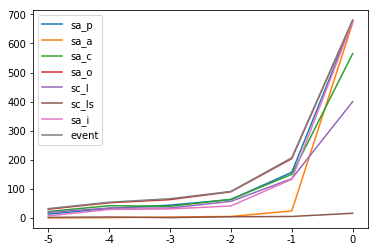

In [41]:
x = ['-5','-4','-3','-2','-1','0']
line1, = plt.plot(x,sa_p)
line2, = plt.plot(x,sa_a)
line3, = plt.plot(x,sa_c)
line4, = plt.plot(x,sc_o)
line5, = plt.plot(x,sc_l)
line6, = plt.plot(x,sc_ls)
line7, = plt.plot(x,sa_i)
line8, = plt.plot(x,event)
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), ('sa_p', 'sa_a', 'sa_c', 'sa_o', 'sc_l', 'sc_ls', 'sa_i', 'event'))
plt.show()

## Similary, we prepare the data for ids who didn't make a purchase

#### We assume, the last date of the given data as the predicting purchase date for these ids.

In [42]:
pos_data = new_data[~new_data['id'].isin(success_ids)]
pos_data[(pos_data['se_category']=='Purchase')&(pos_data['se_action']=='Success')]

pos_data.sort_values(['id','dt'], ascending=[True, True], inplace=True)
pos_data['dt'] = pos_data['dt'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
pos_data['dt'] = pos_data['dt'].dt.date
pos_data['id2']=0

data_2 = pos_data

data_2 = data_2.fillna(0)
data_2['se_action'] = data_2['se_action'].replace('na',0)
data_2['se_action'] = data_2['se_action'].replace(A,'Course_specific')
data_2['se_action'] = data_2['se_action'].replace(['index','Type Page','localStorage','ERR'],'Other')
data_2['se_action'] = data_2['se_action'].replace(['Submitted','Submited'],'Submit')
data_2['se_action'] = data_2['se_action'].replace('SIGNUP','Signup')
data_2['se_category'] = data_2['se_category'].replace(['Head_Icons', 'Form Submit',
       'Dimensions', 'ajaxSignIn', 'Banner', 'Nudge', 'TrackVisit',
       'ajaxSignUp', 'All_Programs', 'Debug', 'Chatbot',
       'Connect', 'LeadHooks', 'Notifications', 'SISLogin'],'Other')
temp_1 = pd.get_dummies(data_2[['se_category']],prefix=['sc'])
temp_2 = pd.get_dummies(data_2[['se_action']],prefix=['sa'])
data_2 = pd.concat([data_2,temp_1,temp_2],axis=1)
data_2.drop(columns=['se_category','se_action','sc_0','sa_0'],inplace=True)

data_2['event'] = data_2['event'].replace('page_view',1)
data_2['event'] = data_2['event'].replace('struct',0)

data_2 = data_2.groupby(['id','dt'],as_index=False).sum()
data_2.sort_values(['id','dt'], ascending=[True, True], inplace=True)

data_2.drop(columns=['se_value',
       'sc_Purchase', 'sa_Category Page', 'sa_Click',
       'sa_Free Trial Registration',
       'sa_LST', 'sa_New Free User Registration', 'sa_Other',
       'sa_Purchase', 'sa_Show', 'sa_Signin', 'sa_Signup',
       'sa_Submit','sa_FORMS',],inplace=True)

data_2['id'].unique().shape
unique_cust_id = data_2['id'].unique()

le = preprocessing.LabelEncoder()
data_2['dt'] = le.fit_transform(data_2['dt'])

last_date = np.sort(data_2['dt'].unique())[-1]
last_date

dates = dict((k,int) for k in unique_cust_id)
for index,row in data_2.iterrows():
    dates[row['id']] = last_date
    
data_2['last_date']=0
data_2['last_date'] = data_2['id'].map(dates)
data_2['rel_date']=0
data_2['rel_date'] = data_2['dt'] - data_2['last_date']

data_2.drop(columns=['dt','last_date'], inplace=True)

selRows = data_2[data_2['rel_date']>0].index
data_2 = data_2.drop(selRows, axis=0)
selRows = data_2[data_2['rel_date']<-5].index
data_2 = data_2.drop(selRows, axis=0)

data_2['rel_date'] = data_2['rel_date'].astype(str)

pt2 = pd.pivot_table(data_2, values=['event','sa_Init','sc_Lead Submit','sc_Leadgen','sc_Other','sa_Add to Cart','sa_Course_specific','sa_Product Detail'], index='id', columns='rel_date')
data_4 = pt2.reset_index()

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

In [43]:
sc_o = []
sa_a = []
sa_c = []
sa_p = []
sc_l = []
sc_ls = []
sa_i = []
event = []
for i in ['-5','-4','-3','-2','-1','0']:
    sc_o.append(data_4.loc[data_4['sc_Other'][i]>0,'sc_Other'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_a.append(data_4.loc[data_4['sa_Add to Cart'][i]>0,'sa_Add to Cart'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_c.append(data_4.loc[data_4['sa_Course_specific'][i]>0,'sa_Course_specific'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_p.append(data_4.loc[data_4['sa_Product Detail'][i]>0,'sa_Product Detail'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_l.append(data_4.loc[data_4['sc_Leadgen'][i]>0,'sc_Leadgen'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sc_ls.append(data_4.loc[data_4['sc_Lead Submit'][i]>0,'sc_Lead Submit'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    sa_i.append(data_3.loc[data_3['sa_Init'][i]>0,'sa_Init'][i].count())
for i in ['-5','-4','-3','-2','-1','0']:
    event.append(data_3.loc[data_3['event'][i]>0,'event'][i].count())

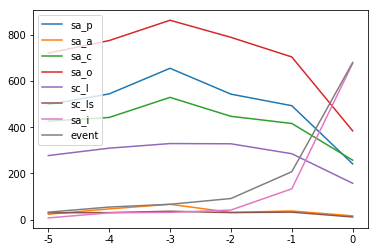

In [44]:
x = ['-5','-4','-3','-2','-1','0']
line1, = plt.plot(x,sa_p)
line2, = plt.plot(x,sa_a)
line3, = plt.plot(x,sa_c)
line4, = plt.plot(x,sc_o)
line5, = plt.plot(x,sc_l)
line6, = plt.plot(x,sc_ls)
line7, = plt.plot(x,sa_i)
line8, = plt.plot(x,event)
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), ('sa_p', 'sa_a', 'sa_c', 'sa_o', 'sc_l', 'sc_ls', 'sa_i', 'event'))

In [45]:
data_3['result'] = 1
data_4['result'] = 0

#### We flatten the multi index columns we obtained after pivoting the dataframe

In [46]:
data_3.columns = ['_'.join(col).rstrip('_') for col in data_3.columns.values]
data_4.columns = ['_'.join(col).rstrip('_') for col in data_4.columns.values]

In [47]:
data_5 = pd.concat([data_3,data_4])
data_5.fillna(0,inplace=True)

In [48]:
data_5.columns

Index(['id', 'event_-1', 'event_-2', 'event_-3', 'event_-4', 'event_-5',
       'event_0', 'sa_Add to Cart_-1', 'sa_Add to Cart_-2',
       'sa_Add to Cart_-3', 'sa_Add to Cart_-4', 'sa_Add to Cart_-5',
       'sa_Add to Cart_0', 'sa_Course_specific_-1', 'sa_Course_specific_-2',
       'sa_Course_specific_-3', 'sa_Course_specific_-4',
       'sa_Course_specific_-5', 'sa_Course_specific_0', 'sa_Init_-1',
       'sa_Init_-2', 'sa_Init_-3', 'sa_Init_-4', 'sa_Init_-5', 'sa_Init_0',
       'sa_Product Detail_-1', 'sa_Product Detail_-2', 'sa_Product Detail_-3',
       'sa_Product Detail_-4', 'sa_Product Detail_-5', 'sa_Product Detail_0',
       'sc_Lead Submit_-1', 'sc_Lead Submit_-2', 'sc_Lead Submit_-3',
       'sc_Lead Submit_-4', 'sc_Lead Submit_-5', 'sc_Lead Submit_0',
       'sc_Leadgen_-1', 'sc_Leadgen_-2', 'sc_Leadgen_-3', 'sc_Leadgen_-4',
       'sc_Leadgen_-5', 'sc_Leadgen_0', 'sc_Other_-1', 'sc_Other_-2',
       'sc_Other_-3', 'sc_Other_-4', 'sc_Other_-5', 'sc_Other_0', 'result'],

### Building the Model

In [52]:
y = data_5["result"].values
x = data_5[['event_-1', 'event_-2', 'event_-3', 'event_-4', 'event_-5',
       'sa_Add to Cart_-1', 'sa_Add to Cart_-2',
       'sa_Add to Cart_-3', 'sa_Add to Cart_-4', 'sa_Add to Cart_-5',
       'sa_Course_specific_-1', 'sa_Course_specific_-2',
       'sa_Course_specific_-3', 'sa_Course_specific_-4',
       'sa_Course_specific_-5','sa_Init_-1',
       'sa_Init_-2', 'sa_Init_-3', 'sa_Init_-4', 'sa_Init_-5',
       'sa_Product Detail_-1', 'sa_Product Detail_-2', 'sa_Product Detail_-3',
       'sa_Product Detail_-4', 'sa_Product Detail_-5']].values

In [53]:
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.25,random_state=0)

In [54]:
model = RandomForestClassifier()
model.fit(train_x,train_y)
preds = model.predict(val_x)

##### Reducing the threshold for predicting values as positive

In [55]:
threshold = 0.25
predicted_proba = model.predict_proba(val_x)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [56]:
accuracy = accuracy_score(preds,val_y)
accuracy_25 = accuracy_score(val_y, predicted)

In [57]:
print(accuracy)
print(accuracy_25)

0.8709315375982043
0.8035914702581369


In [58]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [59]:
class_names = ['No','Yes']
np.set_printoptions(precision=2)

#### Confusion Matrix for the built model

Confusion matrix, without normalization
[[652  54]
 [ 61 124]]


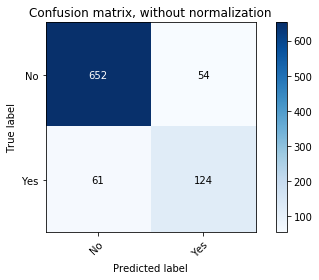

In [60]:
plot_confusion_matrix(val_y, preds, classes=class_names, title='Confusion matrix, without normalization')

#### Confusion matrix for the model with lowered threshold

Confusion matrix, without normalization
[[580 126]
 [ 49 136]]


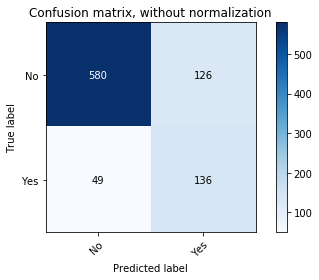

In [61]:
plot_confusion_matrix(val_y, predicted, classes=class_names, title='Confusion matrix, without normalization')

We use the False Positives as a measure to predict our possible customers.

In [62]:
print(model.feature_importances_)

[0.13 0.11 0.07 0.07 0.07 0.01 0.01 0.   0.   0.   0.08 0.04 0.03 0.03
 0.01 0.05 0.03 0.02 0.01 0.01 0.1  0.04 0.04 0.02 0.02]


### Testing using test data

In [63]:
# test = pd.read_csv('test.csv')

# ## train

# userid = np.array(test["id"])
# actual = np.array(test['result']).astype(int)
# answer = pd.DataFrame({'id':userid,'actual':actual,'predicted':predicted})

In [64]:
# answer[(answer['actual']==0)&(answer['predicted']==1)]